In [1]:
import pandas as pd
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA


data= pd.read_csv('USA_Housing.csv')
data.head()

data.info()

data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 6 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
dtypes: float64(6)
memory usage: 234.5 KB


,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562390,5.322283,6.299250,3.140000,29403.928700,9.975771e+05
50%,68804.286405,5.970429,7.002902,4.050000,36199.406690,1.232669e+06
75%,75783.338665,6.650808,7.665871,4.490000,42861.290770,1.471210e+06
max,107701.748400,9.519088,10.759588,6.500000,69621.713380,2.469066e+06


In [2]:
data.fillna(data.mean(), inplace=True)

scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)


In [3]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

In [4]:
k = 2
kmeans = KMeans(n_clusters=k, n_init=10, random_state=42)
kmeans.fit(scaled_data)


KMeans(n_clusters=2, n_init=10, random_state=42)

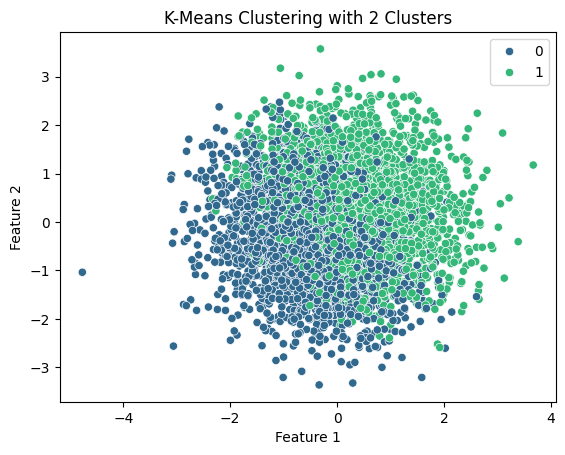

In [5]:
labels = kmeans.labels_

data['Cluster'] = labels

sns.scatterplot(x=scaled_data[:, 0], y=scaled_data[:, 1], hue=labels, palette='viridis')
plt.title(f'K-Means Clustering with {k} Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

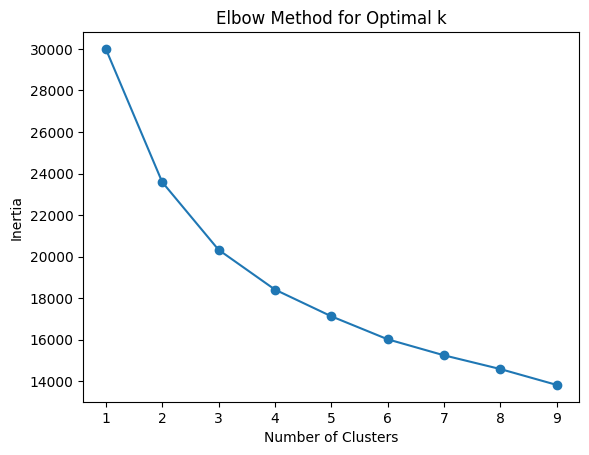

In [6]:
inertia = []
k_range = range(1, 10)
for i in k_range:
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(k_range, inertia, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

sil_score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score for k={k}: {sil_score}')


Silhouette Score for k=2: 0.19163398430490247


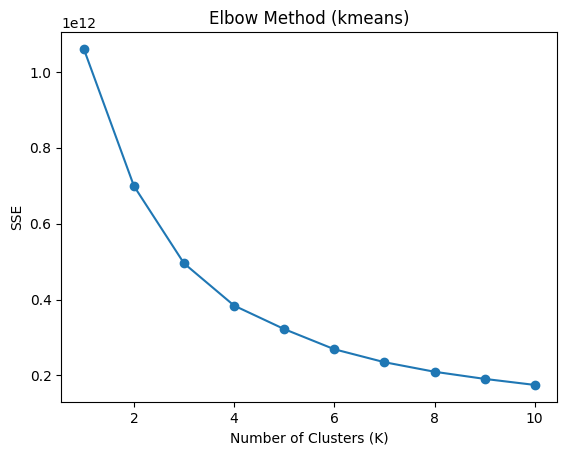

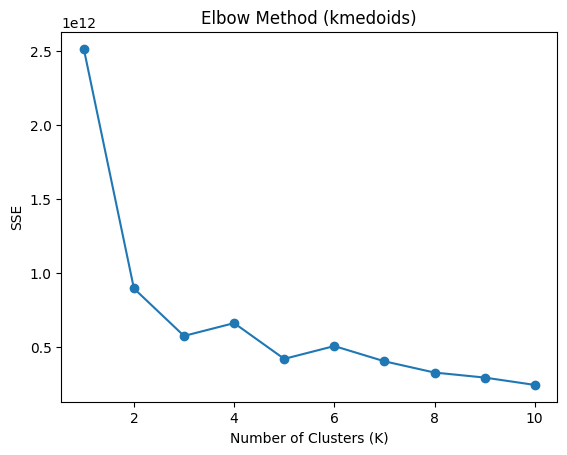

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances

# Load the dataset

data = pd.read_csv('USA_Housing.csv')
data = data.iloc[:, :-1]  # Omit the last attribute

# Function for K-Means
def k_means(data, k, max_iters=100):
    n, d = data.shape
    centroids = data.sample(k).to_numpy()  # Randomly initialize centroids
    for _ in range(max_iters):
        distances = np.linalg.norm(data.to_numpy()[:, None, :] - centroids[None, :, :], axis=2)
        labels = np.argmin(distances, axis=1)
        new_centroids = np.array([data.to_numpy()[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return labels, centroids

# Function for K-Medoids
def k_medoids(data, k, max_iters=100):
    n = data.shape[0]
    medoids = data.sample(k).to_numpy()
    for _ in range(max_iters):
        distances = pairwise_distances(data.to_numpy(), medoids, metric='euclidean')
        labels = np.argmin(distances, axis=1)
        new_medoids = np.array([data.to_numpy()[labels == i][np.argmin(np.sum(distances[labels == i], axis=0))] for i in range(k)])
        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids
    return labels, medoids

# Elbow Method
def compute_sse(data, labels, centroids):
    return sum(np.sum((data.to_numpy()[labels == i] - centroids[i]) ** 2) for i in range(len(centroids)))

def elbow_method(data, algorithm, max_k=10):
    sse = []
    for k in range(1, max_k + 1):
        if algorithm == "kmeans":
            labels, centroids = k_means(data, k)
        elif algorithm == "kmedoids":
            labels, centroids = k_medoids(data, k)
        sse.append(compute_sse(data, labels, centroids))
    plt.plot(range(1, max_k + 1), sse, marker='o')
    plt.xlabel('Number of Clusters (K)')
    plt.ylabel('SSE')
    plt.title(f'Elbow Method ({algorithm})')
    plt.show()

# Execute
elbow_method(data, "kmeans")
elbow_method(data, "kmedoids")

